**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;">Loading libraries and data</span>
<a id="loading"></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [129]:
#loading data
df = pd.read_csv('Telecom_Churn.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Information
**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [131]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column is typed as object so we will convert it to numeric (float)

In [133]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [134]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

In [135]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Seems like we have no missing values

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8" ></a>

Dropping customerID as it's just an identifier and doesn’t help in prediction

In [136]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [138]:
df['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
1990.50     1
7362.90     1
346.45      1
306.60      1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [139]:
print(df['TotalCharges'].isna().sum())

11


* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [140]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [141]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [142]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [143]:
df.shape

(7032, 20)

Now we have 7032 rows and 20 columns after dropping customerID column and 11 rows

In [144]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


 The TotalCharges data is right-skewed so to fill missing values in TotalCharges column, we decided to fill it with the median of TotalCharges values

In [187]:
df.fillna(df["TotalCharges"].median())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [188]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null Values present

___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

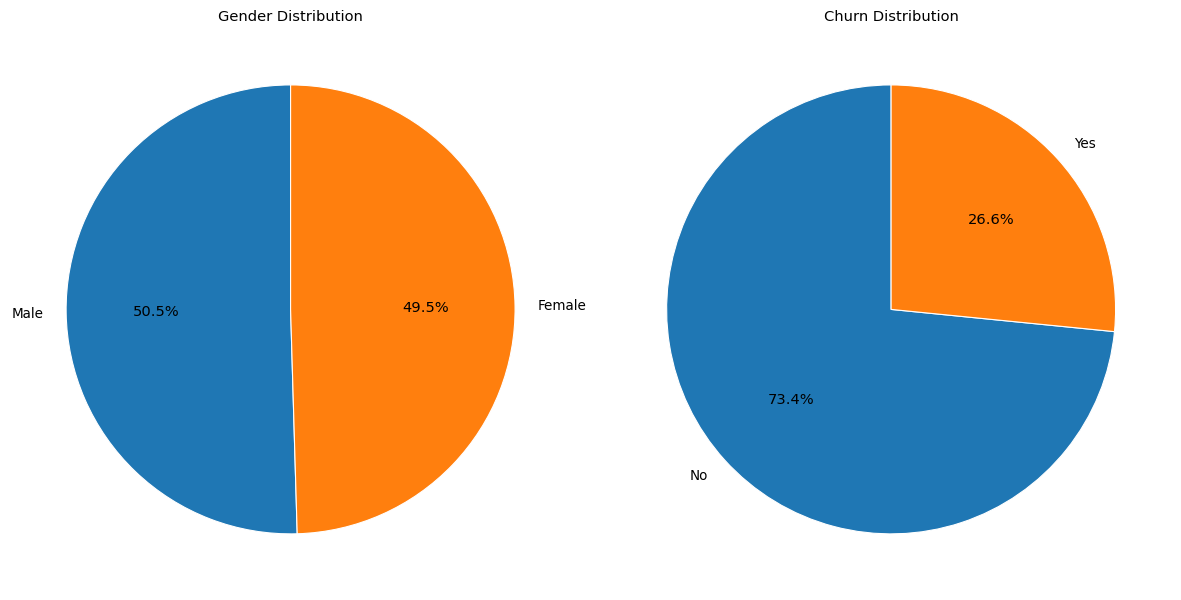

In [150]:


# Labels for gender and churn
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Values for gender and churn
g_values = df['gender'].value_counts()
c_values = df['Churn'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender Pie Chart
axes[0].pie(g_values, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
axes[0].set_title("Gender Distribution")

# Churn Pie Chart
axes[1].pie(c_values, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
axes[1].set_title("Churn Distribution")

# Show the plot
plt.tight_layout()
plt.show()


* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [151]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [152]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

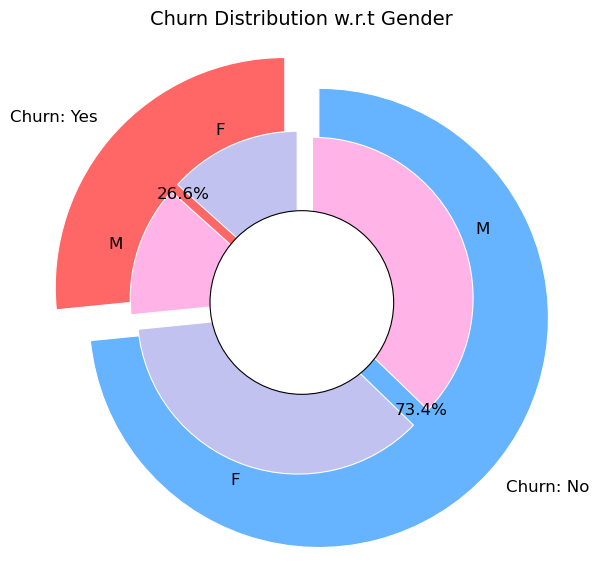

In [153]:


# Data for outer pie chart (Churn distribution)
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
colors = ['#ff6666', '#66b3ff']
explode = (0.1, 0.1)  # Slight explosion for better visibility

# Data for inner pie chart (Gender-wise Churn distribution)
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.05, 0.05, 0.05, 0.05)

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# Outer pie chart (Churn Distribution)
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
       startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})

# Inner pie chart (Gender-wise Churn Distribution)
ax.pie(sizes_gender, labels=labels_gender, colors=colors_gender, explode=explode_gender,
       startangle=90, radius=0.7, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})

# Draw a center circle to create a donut effect
centre_circle = plt.Circle((0, 0), 0.4, fc='white', edgecolor='black')
ax.add_artist(centre_circle)

# Title
plt.title('Churn Distribution w.r.t Gender', fontsize=14)

# Equal aspect ratio to ensure the pie is circular
plt.axis('equal')
plt.show()


* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

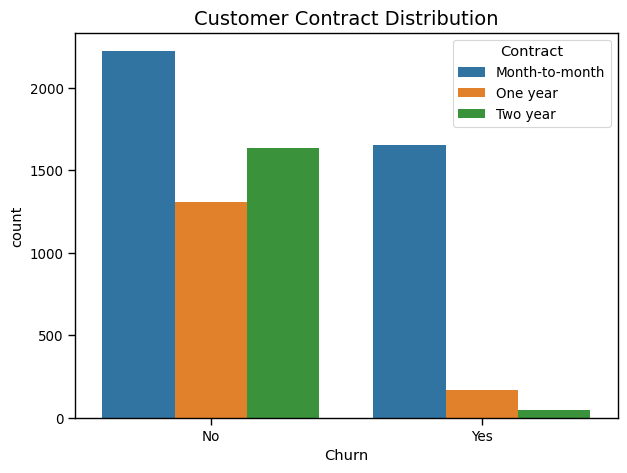

In [154]:

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Contract")

# Add title
plt.title("Customer Contract Distribution", fontsize=14)

# Show the plot
plt.show()


* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

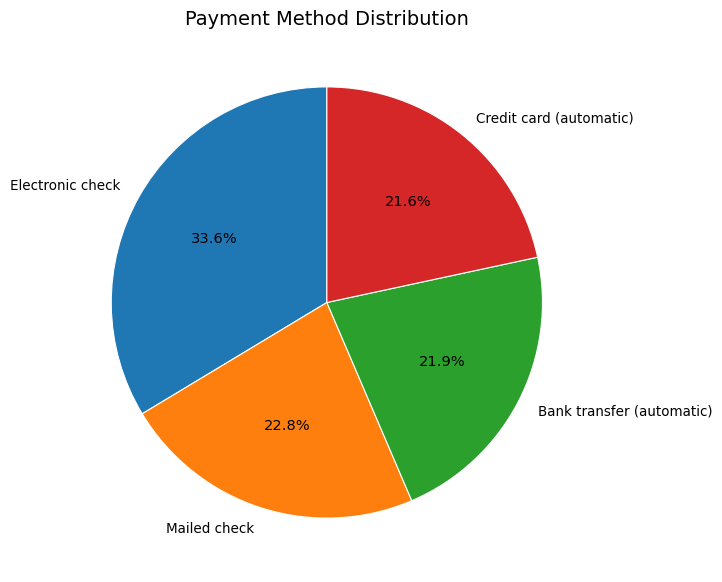

In [155]:


# Data for the pie chart
labels = df['PaymentMethod'].value_counts().index
values = df['PaymentMethod'].value_counts().values

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add title
plt.title("Payment Method Distribution", fontsize=14)

# Show the plot
plt.show()


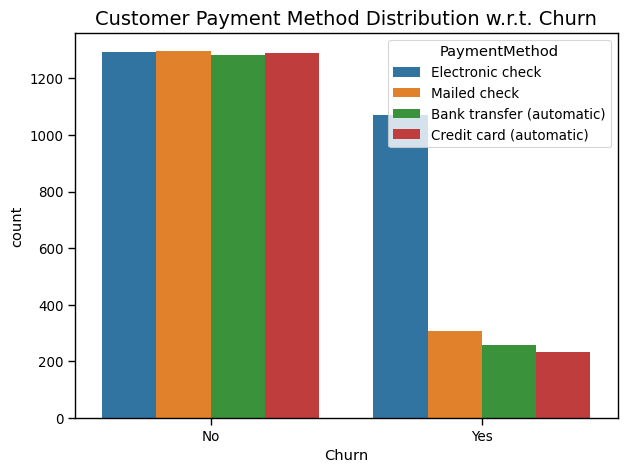

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaymentMethod")

# Add title
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize=14)

# Show the plot
plt.show()


* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [157]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [158]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [159]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

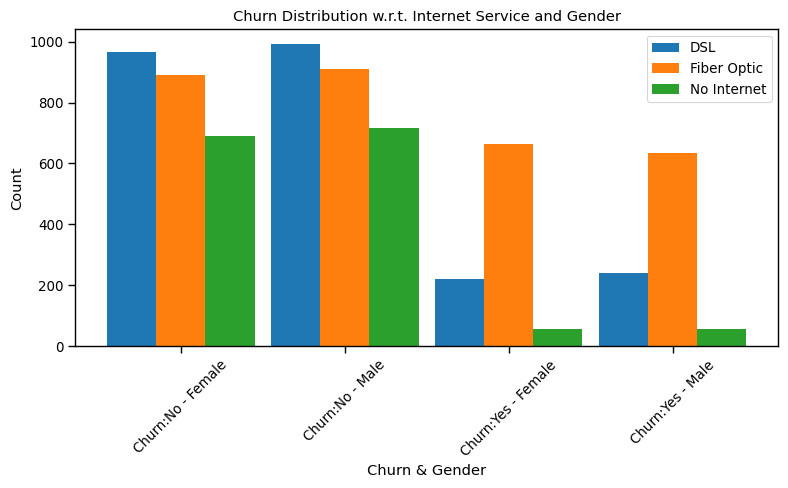

In [160]:

# Data
categories = ['Churn:No - Female', 'Churn:No - Male', 'Churn:Yes - Female', 'Churn:Yes - Male']
dsl_values = [965, 992, 219, 240]
fiber_values = [889, 910, 664, 633]
no_internet_values = [690, 717, 56, 57]

# Set bar width and x positions
x = np.arange(len(categories))
bar_width = 0.3

# Create figure
plt.figure(figsize=(8, 5))

# Plot bars
plt.bar(x - bar_width, dsl_values, width=bar_width, label='DSL')
plt.bar(x, fiber_values, width=bar_width, label='Fiber Optic')
plt.bar(x + bar_width, no_internet_values, width=bar_width, label='No Internet')

# Add labels and title
plt.xticks(x, categories, rotation=45)
plt.xlabel("Churn & Gender")
plt.ylabel("Count")
plt.title("Churn Distribution w.r.t. Internet Service and Gender")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

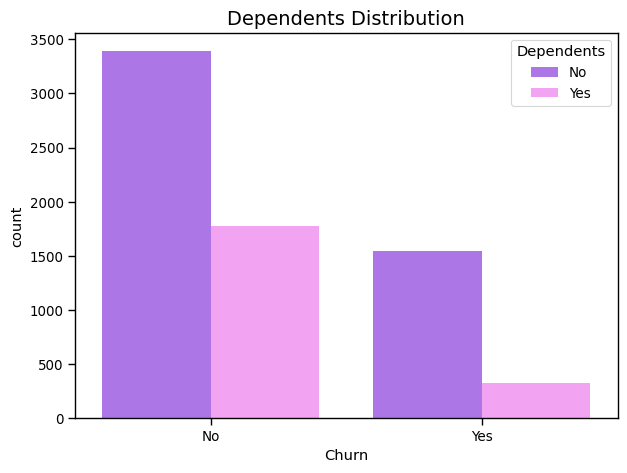

In [161]:

# Define color palette for "Dependents" categories
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Dependents", palette=color_map)

# Add title
plt.title("Dependents Distribution", fontsize=14)

# Show the plot
plt.show()


* Customers without dependents are more likely to churn

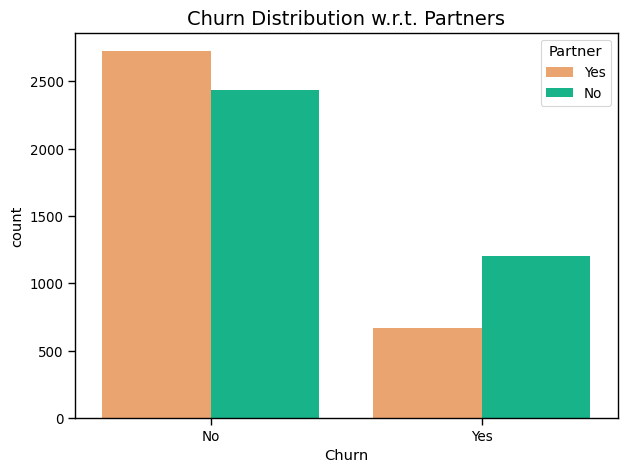

In [162]:


# Define color palette for "Partner" categories
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Partner", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Partners", fontsize=14)

# Show the plot
plt.show()


* Customers that doesn't have partners are more likely to churn

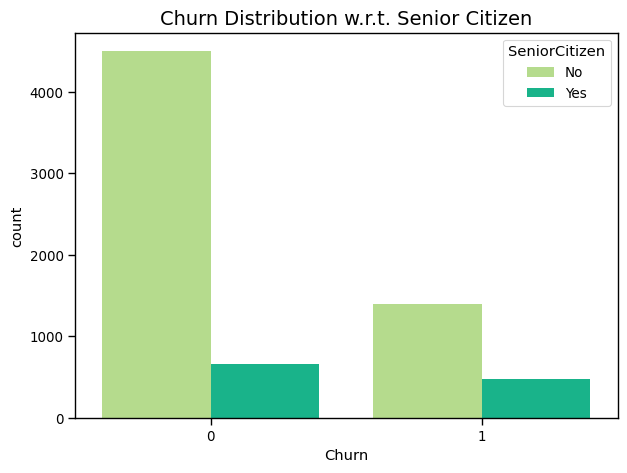

In [190]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
# Define color palette for "SeniorCitizen" categories
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="SeniorCitizen", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Senior Citizen", fontsize=14)

# Show the plot
plt.show()


* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

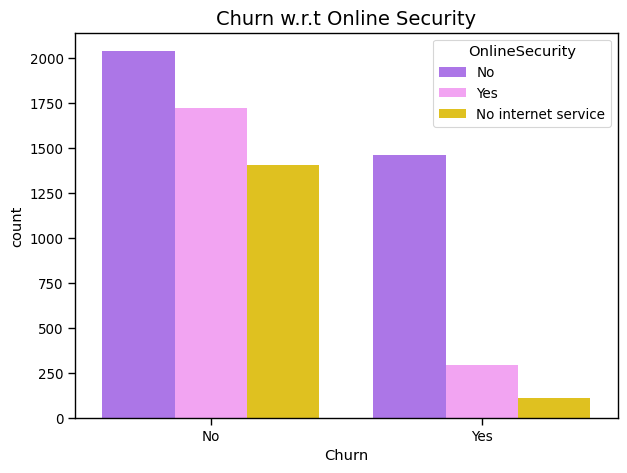

In [164]:
# Define color palette including "No internet service"
color_map = {"Yes": "#FF97FF", "No": "#AB63FA", "No internet service": "#FFD700"}  # Added missing key

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="OnlineSecurity", palette=color_map)

# Add title
plt.title("Churn w.r.t Online Security", fontsize=14)

# Show the plot
plt.show()


* Most customers churn in the absence of online security, 

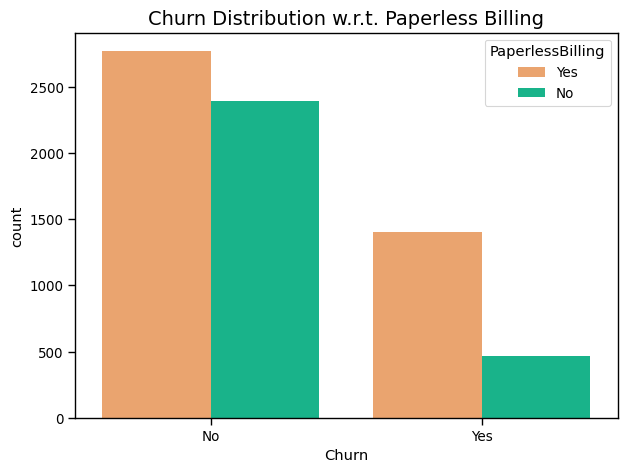

In [165]:

# Define color palette for "PaperlessBilling" categories
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaperlessBilling", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize=14)

# Show the plot
plt.show()


* Customers with Paperless Billing are most likely to churn.

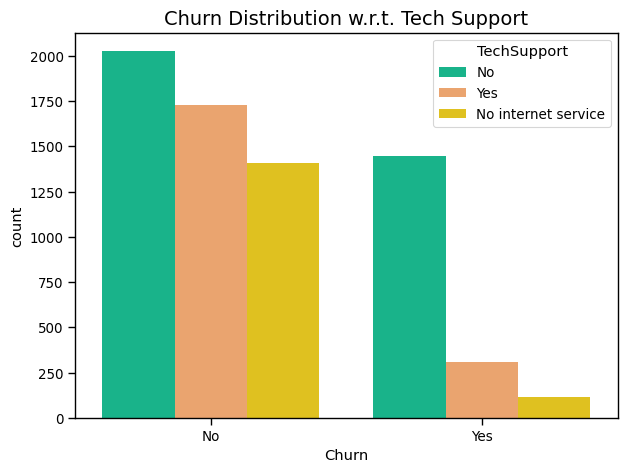

In [166]:

# Define color palette including "No internet service"
color_map = {"Yes": "#FFA15A", "No": "#00CC96", "No internet service": "#FFD700"}  # Added missing category

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="TechSupport", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Tech Support", fontsize=14)

# Show the plot
plt.show()


* Customers with no TechSupport are most likely to migrate to another service provider.

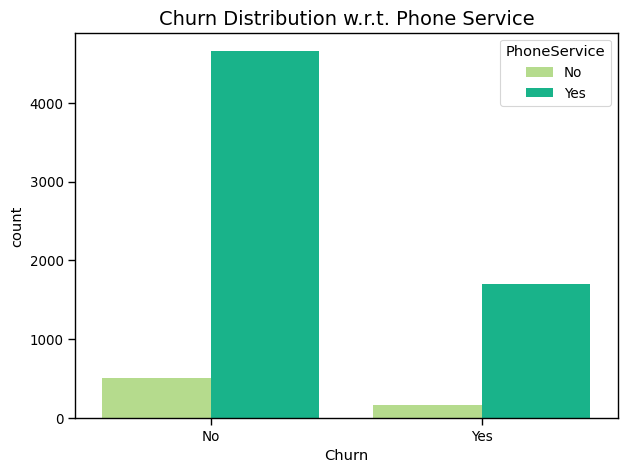

In [167]:

# Define color palette for "PhoneService" categories
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PhoneService", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Phone Service", fontsize=14)

# Show the plot
plt.show()


* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

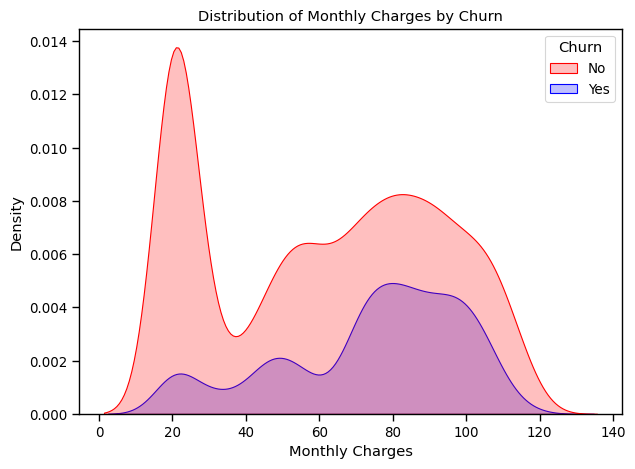

In [168]:
# Set Seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True, palette={"No": "Red", "Yes": "Blue"})

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges by Churn")

# Show the plot
plt.show()


* Customers with higher Monthly Charges are also more likely to churn

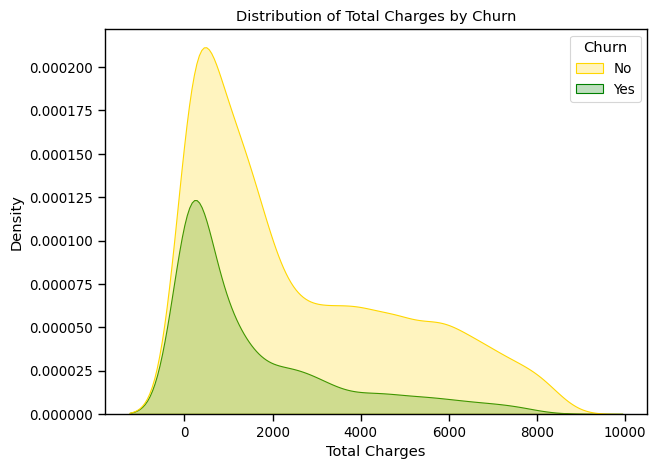

In [169]:

# Set Seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True, palette={"No": "Gold", "Yes": "Green"})

# Add labels and title
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Distribution of Total Charges by Churn")

# Show the plot
plt.show()


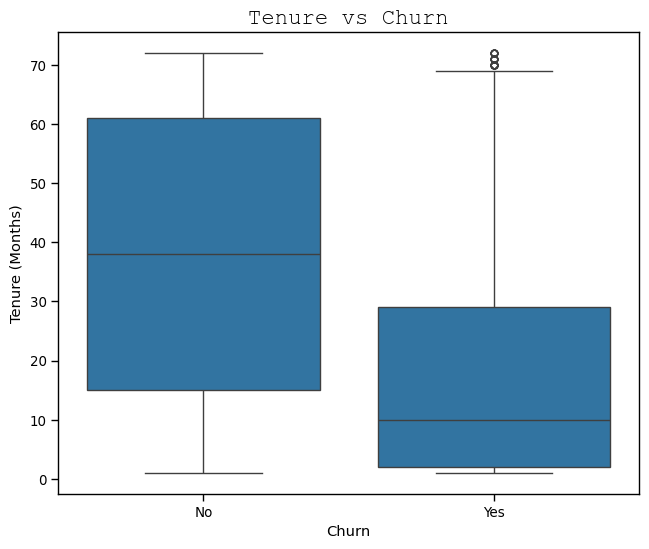

In [170]:
# Create the box plot
plt.figure(figsize=(7.5, 6))
sns.boxplot(data=df, x="Churn", y="tenure")

# Add title and labels
plt.title("Tenure vs Churn", fontsize=16, fontfamily="Courier New")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")

# Show the plot
plt.show()


* New customers are more likely to churn

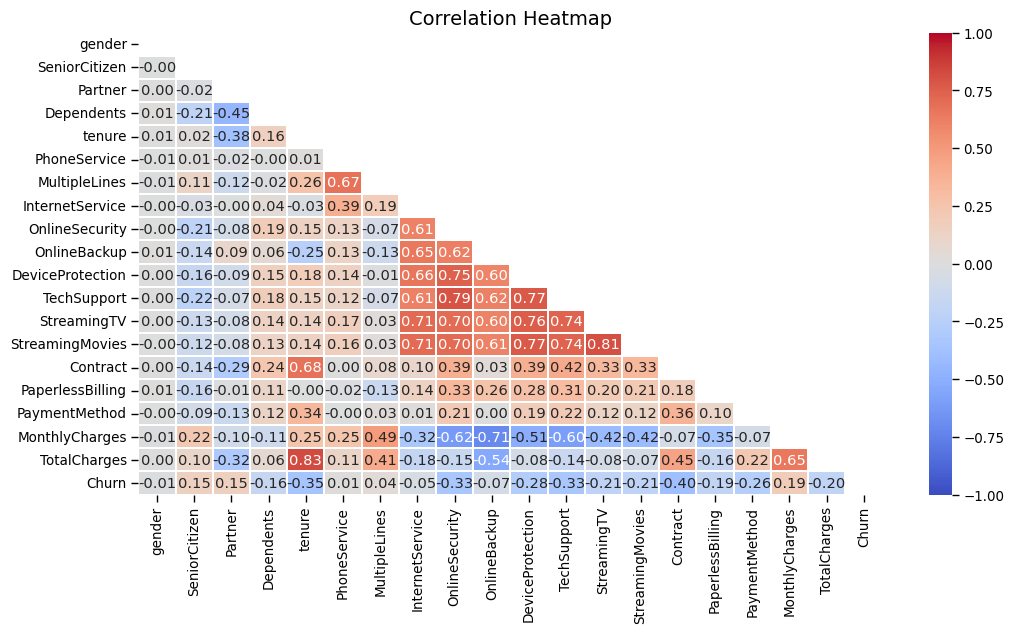

In [171]:

# Compute the correlation matrix with factorized categorical data
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()

# Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 6))  # Reduced size for better readability
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Heatmap", fontsize=14)

# Show plot
plt.show()


___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

In [191]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({'No': 0, 'Yes': 1})

In [193]:
#  Label Encode Binary Columns
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [194]:
#  One-Hot Encode Multi-category Columns
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [195]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                 1.000000
InternetService_1     0.307463
PaymentMethod_2       0.301455
MonthlyCharges        0.192858
PaperlessBilling      0.191454
SeniorCitizen         0.150541
StreamingTV_2         0.063254
StreamingMovies_2     0.060860
MultipleLines_2       0.040033
PhoneService          0.011691
gender               -0.008545
MultipleLines_1      -0.011691
DeviceProtection_2   -0.066193
OnlineBackup_2       -0.082307
PaymentMethod_3      -0.090773
PaymentMethod_1      -0.134687
Partner              -0.149982
Dependents           -0.163128
TechSupport_2        -0.164716
OnlineSecurity_2     -0.171270
Contract_1           -0.178225
TotalCharges         -0.199484
InternetService_2    -0.227578
StreamingTV_1        -0.227578
OnlineSecurity_1     -0.227578
OnlineBackup_1       -0.227578
DeviceProtection_1   -0.227578
StreamingMovies_1    -0.227578
TechSupport_1        -0.227578
Contract_2           -0.301552
tenure               -0.354049
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [175]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [177]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

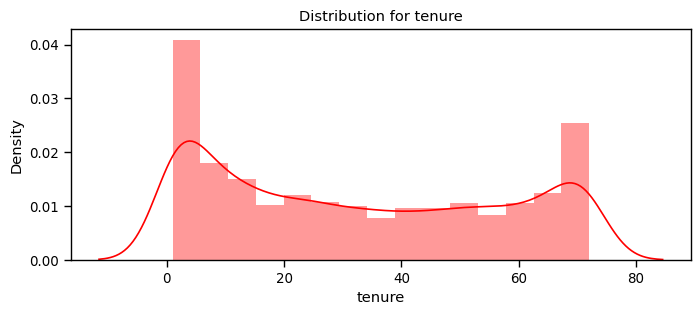

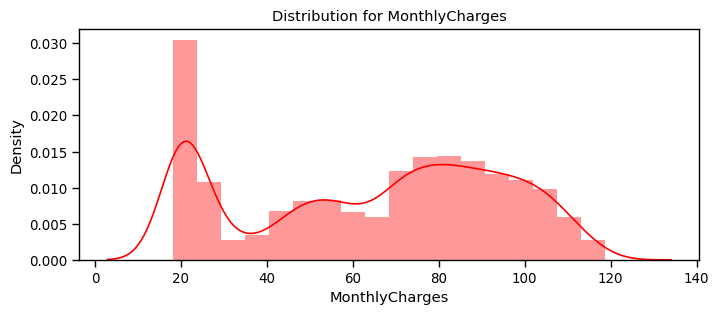

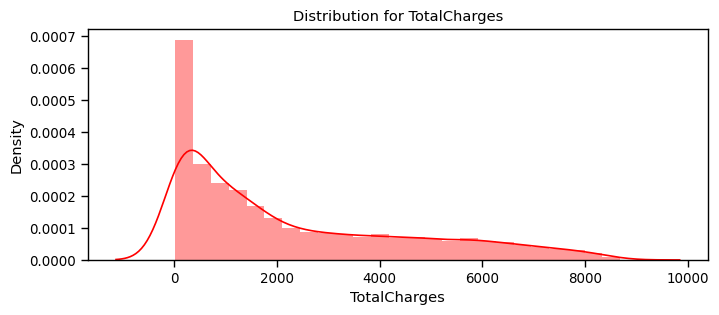

In [178]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

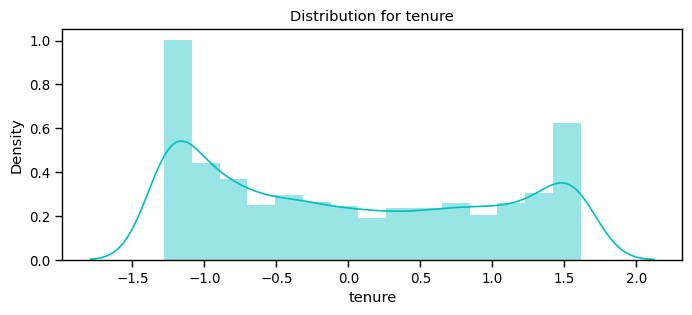

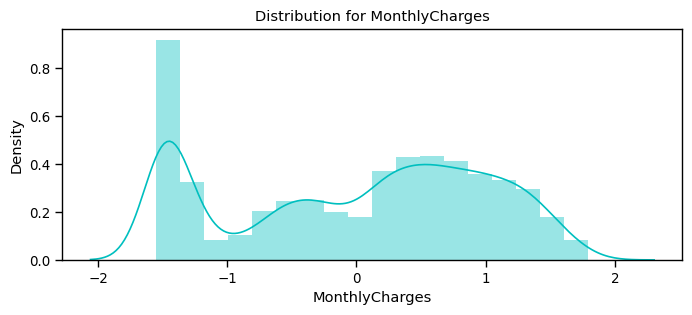

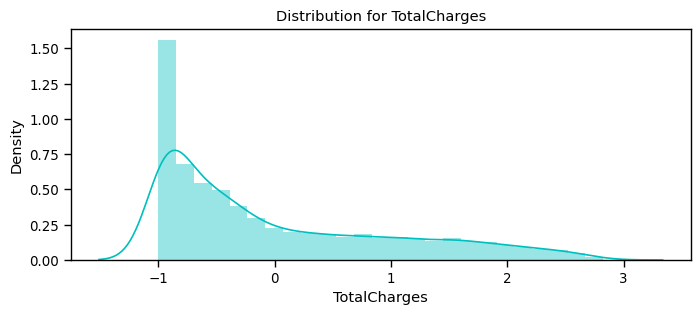

In [179]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [180]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [181]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [182]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [183]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [184]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [185]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [186]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



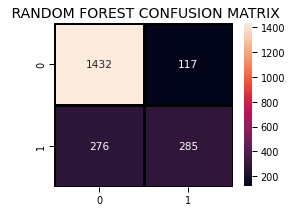

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



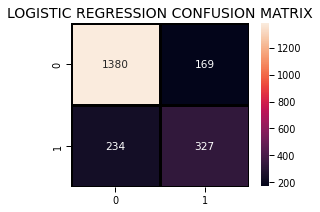

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7251184834123223


Decision tree gives very low score.

In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.51      0.49       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.73      0.73      2110



Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn. 